In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist


Using TensorFlow backend.


In [3]:
(x_train, _), (x_test, _) = mnist.load_data()


In [4]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
     

In [5]:

# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [6]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [7]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

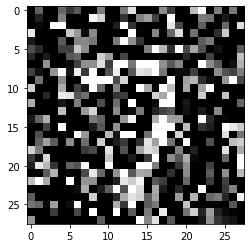

In [9]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

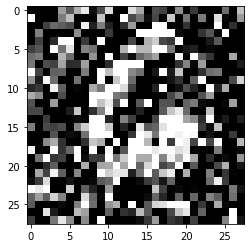

In [10]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

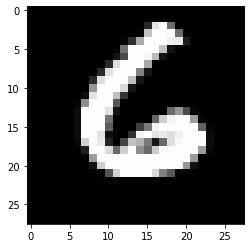

In [11]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4

In [13]:
from tensorflow.keras.models import Model
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 66s 281ms/step - loss: 0.2256 - val_loss: 0.1515
Epoch 2/20
235/235 [==============================] - 66s 283ms/step - loss: 0.1438 - val_loss: 0.1366
Epoch 3/20
235/235 [==============================] - 66s 282ms/step - loss: 0.1350 - val_loss: 0.1309
Epoch 4/20
235/235 [==============================] - 65s 277ms/step - loss: 0.1308 - val_loss: 0.1282
Epoch 5/20
235/235 [==============================] - 66s 280ms/step - loss: 0.1279 - val_loss: 0.1256
Epoch 6/20
235/235 [==============================] - 61s 259ms/step - loss: 0.1257 - val_loss: 0.1234
Epoch 7/20
235/235 [==============================] - 65s 275ms/step - loss: 0.1239 - val_loss: 0.1217
Epoch 8/20
235/235 [==============================] - 62s 264ms/step - loss: 0.1224 - val_loss: 0.1203
Epoch 9/20
235/235 [==============================] - 63s 267ms/step - loss: 0.1211 - val_loss: 0.1193
Epoch 10/20
235/235 [==============================] - 62s 266ms/step - l

In [14]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

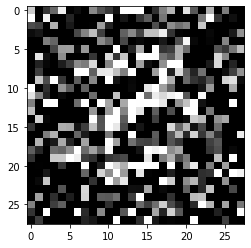

In [15]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

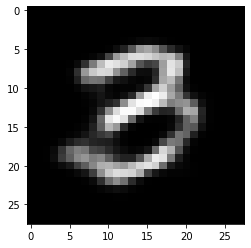

In [16]:

# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

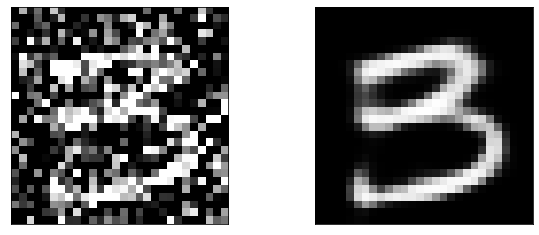

In [17]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

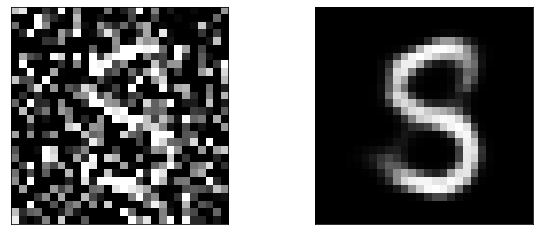

In [18]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()